In [35]:
# develop-entropy-to-basin-sizes.ipynb
#
# Bryan Daniels / Enrico Borriello
# 2023/6/7
#
# Goal: function that produces a list of basin sizes that corresponds to a given basin entropy.
#
# Jun 14, 2023
# New Goal: generate actual values of h_tilde, generate attractor landscape an evaluate CKs.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
def basin_entropy(w):
    # use masked array (ma) to avoid problems with zero
    return -np.dot(w,np.ma.log2(w).filled(0.))

In [116]:
def entropy_to_relative_basin_sizes(h_tilde,r,n,tol=1e-3):
    
    h_tilde_min = (r-1)*n/2**n -(1-(r-1)/2**n)*np.log2((1-(r-1)/2**n))
    
    if h_tilde > np.log2(r): 
        raise ValueError("Basin entropy cannot be larger than log2(r)")
        
    if h_tilde < h_tilde_min:
        raise Exception("h_tilde below h_tilde_min = "+str(h_tilde_min))
        
    func = lambda w: (basin_entropy(w) - h_tilde)**2
    w0 = [ (i+1)/(r*(r+1)/2) for i in range(r) ]
    normConstraint = scipy.optimize.LinearConstraint(np.ones(r),lb=1.,ub=1.)
    bound = scipy.optimize.Bounds(lb=1./2**n,ub=1.)
    solution = scipy.optimize.minimize(func,w0,constraints=normConstraint,bounds=bound)
    if solution.success and np.sqrt(solution.fun) < tol:
        return solution.x
    else:
        raise Exception("Solution not found within given tolerance")

In [101]:
n = 14
r  = 10
print(r)
print(np.log2(10))
print(h_tilde_min)

10
3.321928094887362
0.008482708037266622


In [106]:
h_tilde = 0.1
w = entropy_to_basin_sizes(h_tilde,r,n)
basin_entropy(w)

0.10020780026151203

Text(0, 0.5, '$w_i$')

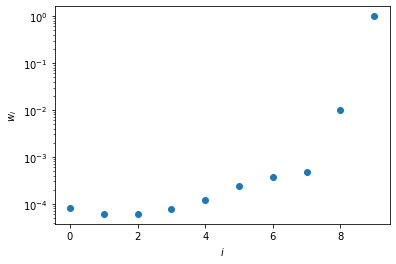

In [107]:
plt.plot(w,'o')
plt.yscale('log')
plt.xlabel('$i$')
plt.ylabel('$w_i$')

In [121]:
def entropy_to_basin_sizes(h_tilde,r,n):
    w = entropy_to_relative_basin_sizes(h_tilde,r,n)
    w_int = [round(w[_]*2**n) for _ in range(len(w))]
    w_int[-1] = w_int[-1] +  2**n - np.sum(w_int)
    return np.array(w_int)

In [123]:
entropy_to_basin_sizes(.01,10,14)/2**n

array([6.10351562e-05, 6.10351562e-05, 6.10351562e-05, 6.10351562e-05,
       6.10351562e-05, 6.10351562e-05, 6.10351562e-05, 6.10351562e-05,
       1.83105469e-04, 9.99328613e-01])

In [126]:
entropy_to_basin_sizes(.01,10,14)

array([    1,     1,     1,     1,     1,     1,     1,     1,     3,
       16373])

In [124]:
basin_entropy(   entropy_to_basin_sizes(.01,10,14)/2**n   )

0.010077479823021712

In [125]:
h_tilde

0.1

# old

In [ ]:
# max h is log2(r)

In [74]:
# try using `minimize` function
# r = len(w)
r = 50
h_tilde = 4.5
if h_tilde > np.log2(r): 
    raise ValueError("Basin entropy cannot be larger than log2(r)")
func = lambda w: (basin_entropy(w) - h_tilde)**2
w0 = [ (i+1)/(r*(r+1)/2) for i in range(r) ]
print("sum(w0) = {}".format(np.sum(w0)))
normConstraint = scipy.optimize.LinearConstraint(np.ones(r),lb=1.,ub=1.)
bound = scipy.optimize.Bounds(lb=0.,ub=1.)
solution = scipy.optimize.minimize(func,w0,constraints=normConstraint,bounds=bound)

sum(w0) = 1.0


In [76]:
basin_entropy(solution.x)

4.50030543769444

In [86]:
solution.status

0

Text(0, 0.5, '$w_i$')

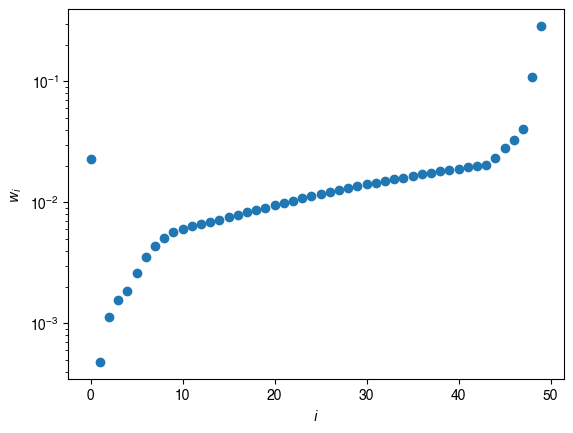

In [75]:
plt.plot(solution.x,'o')
plt.yscale('log')
plt.xlabel('$i$')
plt.ylabel('$w_i$')

In [17]:
# try using root-finding function
r = 5
h_tilde = 2
entropyFunc = lambda w: (basin_entropy(w) - h_tilde)**2
normFunc = lambda w: (np.dot(np.ones(r),w) - 1.)**2
rootFunc = lambda w: [entropyFunc(w),normFunc(w)]
w0 = [ 1./r for i in range(r) ]
scipy.optimize.root(rootFunc,w0)

TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument '<lambda>'.Shape should be (5,) but it is (2,).